# Compte rendu TP1 : traîtement d'images

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from PIL import Image
from skimage.color import rgb2gray
import cv2


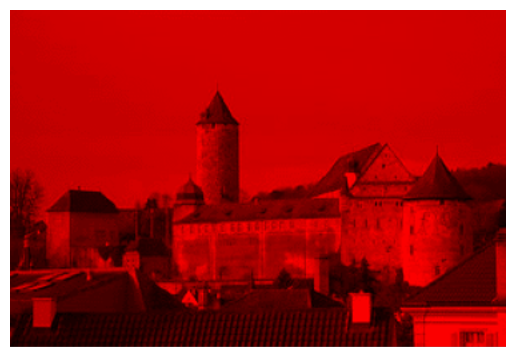

In [3]:
def extraction_rouge(chemin):
    image = Image.open(chemin)
    I = np.array(image)

    I_rouge = I.copy()

    I_rouge[:, :, 1] = 0
    I_rouge[:, :, 2] = 0

    image_rouge = Image.fromarray(I_rouge)

    plt.imshow(image_rouge, cmap='gray')
    plt.axis('off')
    plt.show()

    return image_rouge

chemin = "donjon.png"
image_rouge = extraction_rouge(chemin)


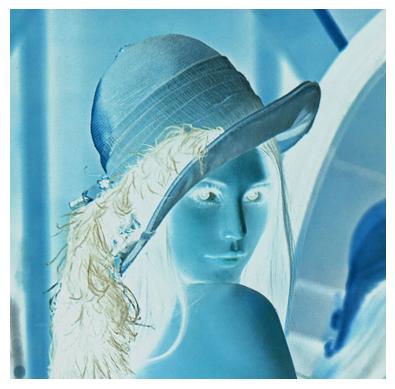

In [4]:
def negatif(chemin):
    image = Image.open(chemin)
    I = np.array(image)

    image_negative = 255 - I

    plt.imshow(image_negative)
    plt.axis('off')
    plt.show()

    return image_negative

chemin = "Lena.jpg"
image_negative = negatif(chemin)

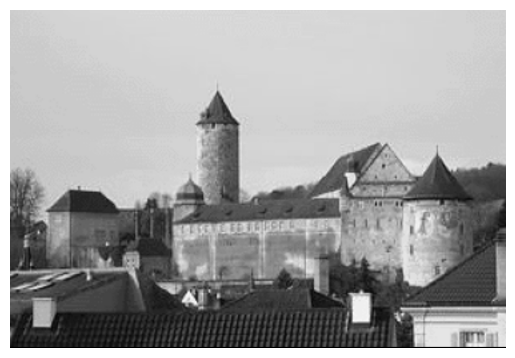

In [5]:
def nuances_gris(chemin):
    image = Image.open(chemin)
    I = np.array(image)
    
    I_grise = 0.299 * I[:, :, 0] + 0.587 * I[:, :, 1] + 0.114 * I[:, :, 2]

    image_grise = Image.fromarray(I_grise)

    plt.imshow(image_grise)
    plt.axis('off')
    plt.show()
    
    return image_grise

chemin = "donjon.png"
image_grise = nuances_gris(chemin)

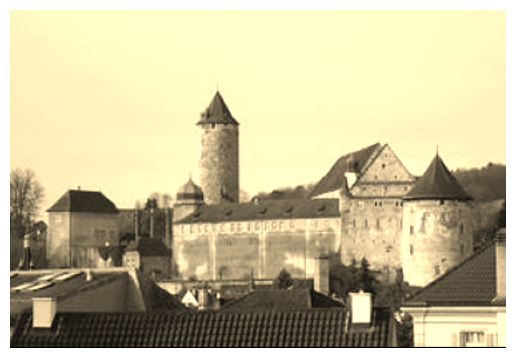

In [6]:
def effet_sepia(chemin):
    image = Image.open(chemin)
    I = np.array(image)

    outputRed = (I[:, :, 0] * 0.393 + I[:, :, 1] * 0.769 + I[:, :, 2] * 0.189)
    outputGreen = (I[:, :, 0] * 0.349 + I[:, :, 1] * 0.686 + I[:, :, 2] * 0.168)
    outputBlue = (I[:, :, 0] * 0.272 + I[:, :, 1] * 0.534 + I[:, :, 2] * 0.131)

    sepia = np.stack([outputRed, outputGreen, outputBlue], axis=-1) # créer un tableau numpy avec les outputs en empilant les listes
    sepia = np.clip(sepia, 0, 255).astype(np.uint8) # s'assurer que les valeurs sont entre 0 et 255
    image_sepia = Image.fromarray(sepia)

    plt.imshow(image_sepia)
    plt.axis('off')
    plt.show()

    return image_sepia

chemin = "donjon.png"
image_sepia = effet_sepia(chemin)

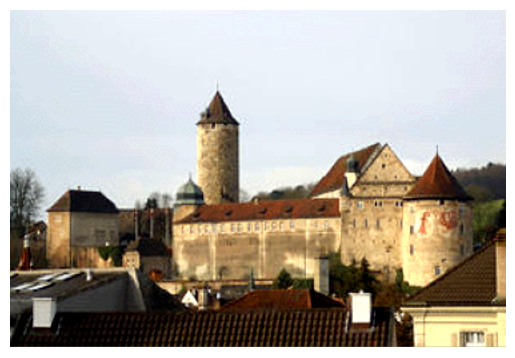

In [7]:
def adjust_contrast(chemin):
    image = Image.open(chemin)
    I = np.array(image)

    I = np.where(I < 30, 0, I) # Si la valeur est plus petite que 30, assignez la valeur 0
    I = np.where(I > 225, 255, I) # Si la valeur est plus grande que 225, assignez la valeur 255

    autres = (I >= 30) & (I <= 225) # Les valeurs c comprises entre 30 et 225 
    I[autres] = ((I[autres] - 30) * (255 / (225 - 30)) + 0.5) # recalculées avec la formule : (255.0 / 195.0) * (c - 30) + 0.5

    image_constrate = Image.fromarray(I)
    plt.imshow(image_constrate)
    plt.axis('off')
    plt.show()

    return image_constrate

chemin = "donjon.png"
image_contraste = adjust_contrast(chemin)

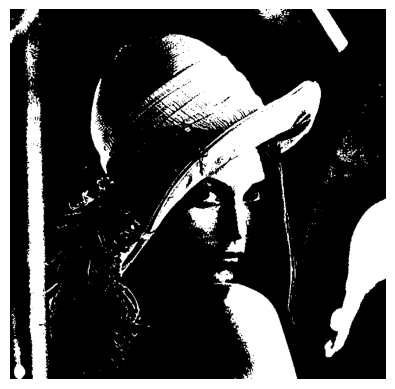

In [8]:
def seuillage(chemin, seuil=123):
    image = Image.open(chemin)
    I = np.array(image)

    I_gris = rgb2gray(I) * 255  # conversion en niveaux de gris

    # On remplace un à un les pixels d'une image par rapport à une valeur seuil fixée, ici 123
    I_seuil = np.where(I_gris > seuil, 255, 0).astype(np.uint8) 

    image_seuil = Image.fromarray(I_seuil)
    plt.imshow(image_seuil, cmap='gray')
    plt.axis('off')
    plt.show()

    return image_seuil

chemin = "Lena.jpg"
image_seuil = seuillage(chemin, seuil=123)

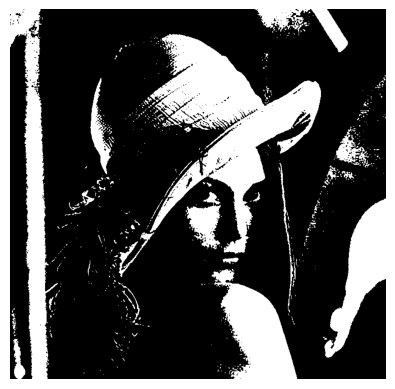

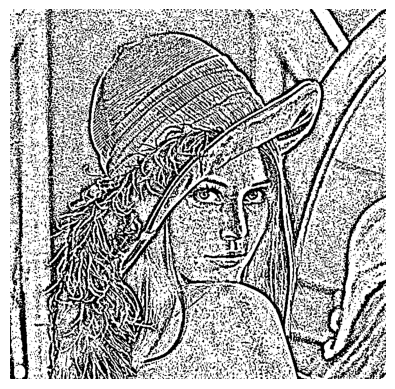

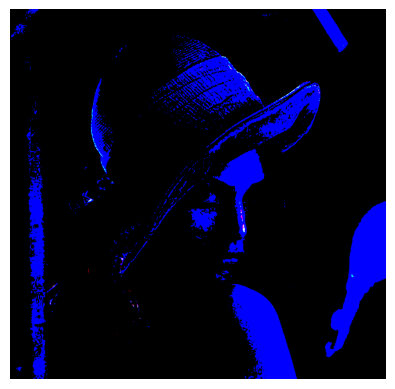

In [9]:
# Application des fonctions de seuillage de cv2

image = cv2.imread('Lena.jpg', 0) # lire l'image en niveaux de gris

_, image_seuil_simple = cv2.threshold(image, 123, 255, cv2.THRESH_BINARY) # seuillage simple
plt.imshow(image_seuil_simple, cmap='gray')
plt.axis('off')
plt.show()

image_seuil_adapt = cv2.adaptiveThreshold(image, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 2) # seuillage adaptatif (les paramètres 11 et 2 représentent la taille du voisinage et une constante enlever de la moyenne)
plt.imshow(image_seuil_adapt, cmap='gray')
plt.axis('off')
plt.show()

image_couleur = cv2.imread('Lena.jpg') # lire l'image en couleur

_, image_seuil_couleur = cv2.threshold(image_couleur, 200, 255, cv2.THRESH_BINARY)
plt.imshow(image_seuil_couleur)
plt.axis('off')
plt.show()

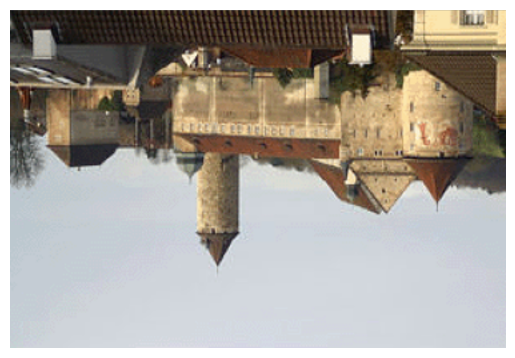

In [10]:
def flippeur_image(chemin):
    image = Image.open(chemin)
    I = np.array(image)

    I_flip = np.flipud(I)

    image_flip = Image.fromarray(I_flip)
    plt.imshow(image_flip)
    plt.axis('off')
    plt.show()

    return image_flip

chemin = "donjon.png"
image_flip = flippeur_image(chemin)


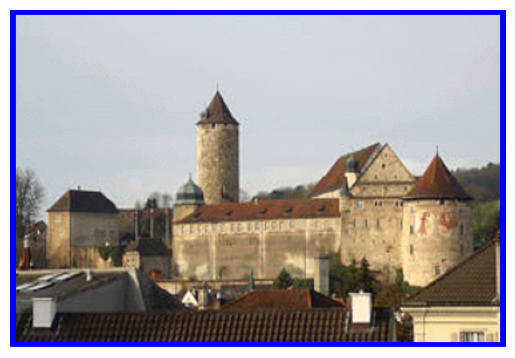

In [11]:
def bord_bleu(chemin, taille_bord=5):
    image = Image.open(chemin)
    I = np.array(image)

    I_bord = I

    for i in range(taille_bord):
        I_bord[i, :, 0] = 0 # bord sup
        I_bord[i, :, 1] = 0
        I_bord[i, :, 2] = 255

        I_bord[-(i+1), :, 0] = 0 # bord inf
        I_bord[-(i+1), :, 1] = 0
        I_bord[-(i+1), :, 2] = 255

        I_bord[:, i, 0] = 0 # bord gauche
        I_bord[:, i, 1] = 0
        I_bord[:, i, 2] = 255

        I_bord[:, -(i+1), 0] = 0 # bord droit
        I_bord[:, -(i+1), 1] = 0
        I_bord[:, -(i+1), 2] = 255

    image_bord_bleu = Image.fromarray(I_bord)
    plt.imshow(image_bord_bleu)
    plt.axis('off')
    plt.show()

    return image_bord_bleu

chemin = "donjon.png"
bord = bord_bleu(chemin)


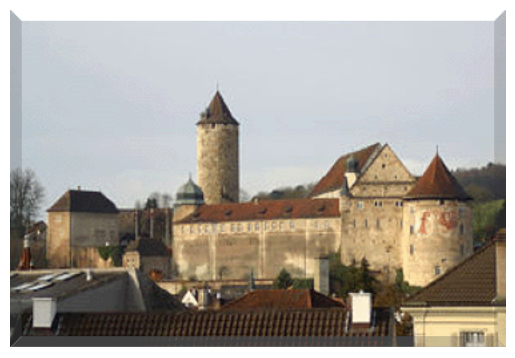

In [12]:
def relief(chemin):
    image = Image.open(chemin)
    I = np.array(image).astype(np.int16) # pour éviter d'aller en négatif ou au dessus de 255
    
    h, w, _ = I.shape

    I_bord = I
    taille_bord = 10

    for i in range(taille_bord):
        I_bord[i, i:(w-i), :] += 65 # bord sup
        I_bord[-(i+1), i:(w-i), :] -= 65 # bord inf
        I_bord[i:(h-i), i, :] -= 40 # bord gauche
        I_bord[i:(h-i), -(i+1), :] -= 40 # bord droit
    
    I_bord = np.clip(I_bord, 0, 255).astype(np.uint8) # s'assurer que les valeurs sont entre 0 et 255

    image_bord_bleu = Image.fromarray(I_bord)
    plt.imshow(image_bord_bleu)
    plt.axis('off')
    plt.savefig("relief_donjon.png")
    plt.show()

    return image_bord_bleu

chemin = "donjon.png"
relief_image = relief(chemin)


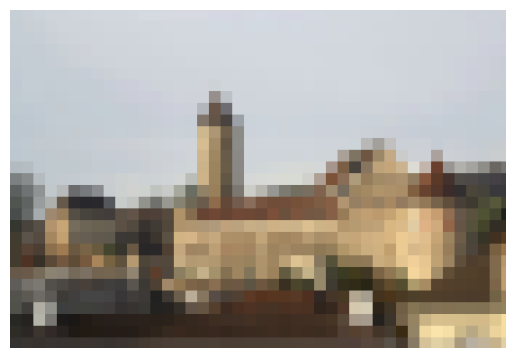

In [13]:
def pixelisation(chemin, fois=10):
    image = Image.open(chemin) 
    I = np.array(image)
    
    h, w, _ = I.shape
    I_pixel = I

    for i in range(0, h, fois): # parcourir l'image par blocs de fois*fois pixels dans la hauteur
        for j in range(0, w, fois): # parcourir l'image par blocs de fois*fois pixels dans la largeur

            # limite du carré de fois*fois pixels
            y_fin = min(i + fois, h)
            x_fin = min(j + fois, w)

            # calcul de la couleur moyenne dans le carré
            carre = I[i:y_fin, j:x_fin]
            couleur_mean = carre.mean(axis=(0, 1)).astype(np.uint8)

            # tous les pixels du carré prennent la couleur moyenne
            I_pixel[i:y_fin, j:x_fin] = couleur_mean

    image_pixel = Image.fromarray(I_pixel)
    plt.imshow(image_pixel)
    plt.axis('off')
    plt.show()

    return image_pixel

chemin = "donjon.png"
image_pixel = pixelisation(chemin, fois=10)

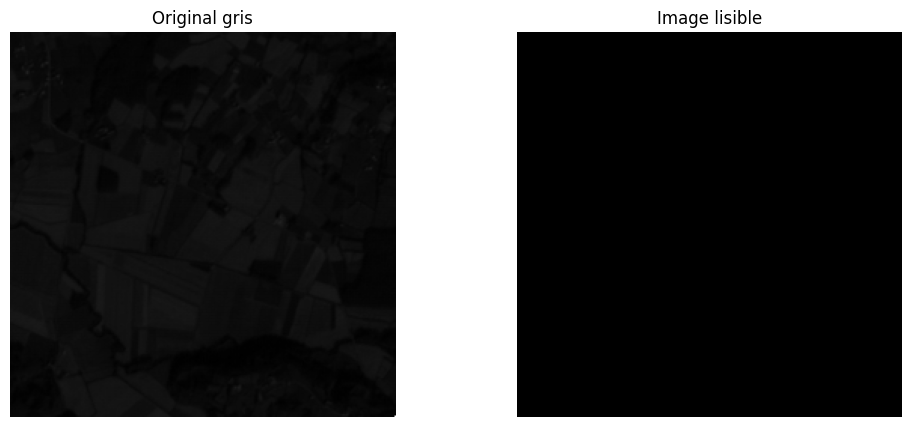

In [14]:
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
from skimage.color import rgb2gray
from skimage import exposure, filters, morphology

def enhance_image(chemin):
    image = Image.open(chemin)
    I = np.array(image) / 255.0  # normalisation entre 0 et 1

    # 1) Conversion en niveaux de gris
    I_gris = I  # valeurs entre 0 et 1

    # 2) Égalisation d’histogramme pour améliorer le contraste
    I_eq = exposure.equalize_adapthist(I_gris, clip_limit=0.03)  

    # 3) Filtrage médian pour réduire le bruit
    from skimage.filters import median
    from skimage.morphology import disk
    I_filt = median(I_eq, disk(1))

    # 4) Seuillage adaptatif (noir/blanc net)
    I_thresh = filters.threshold_local(I_filt, block_size=35, offset=10)
    I_bw = I_filt > I_thresh

    # 5) Nettoyage morphologique (optionnel)
    I_clean = morphology.remove_small_objects(I_bw, min_size=30)

    # Affichage
    plt.figure(figsize=(12,5))
    plt.subplot(1,2,1)
    plt.imshow(I_gris, cmap='gray')
    plt.title("Original gris")
    plt.axis('off')

    plt.subplot(1,2,2)
    plt.imshow(I_clean, cmap='gray')
    plt.title("Image lisible")
    plt.axis('off')
    plt.show()

    return Image.fromarray((I_clean*255).astype(np.uint8))

# Exemple
chemin = "aquitain.tif"
image_enhance = enhance_image(chemin)


In [15]:
def lisible(chemin):
    image = Image.open(chemin)
    I = np.array(image)





    
    return image

    
chemin = "aquitain.tif"
image = lisible(chemin)



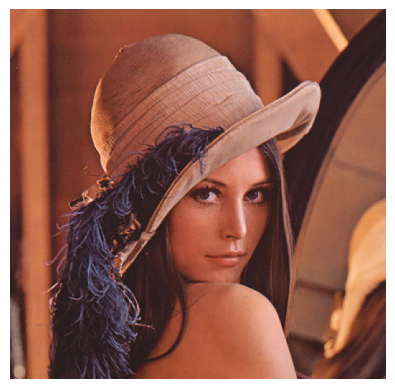

In [16]:
# fonction de filtrage
# fonction de lissage 
def filtrage_median(chemin, taille_voisinage=9):
    image = Image.open(chemin)
    I = np.array(image)

    I_lisse = cv2.medianBlur(I, taille_voisinage) # appliquer un filtre médian

    image_lisse = Image.fromarray(I_lisse)
    plt.imshow(image_lisse)
    plt.axis('off')
    plt.show()

    return image_lisse

# fonction d'accentuation
def accentuation(chemin, force=10):
    image = Image.open(chemin).convert("RGB")
    I = np.array(image)

    h, w, _ = I.shape
    I_out = I.copy()

    for i in range(0, h-2, force):
        for j in range(0, w-2, force):
            # Extraire le bloc 3x3
            bloc = I[i:i+3, j:j+3, :]

            # Calculer la moyenne des 9 pixels
            mean_val = np.mean(bloc, axis=(0,1))

            # Appliquer cette moyenne à tout le bloc
            I_out[i:i+3, j:j+3, :] = mean_val

    image_accentuee = Image.fromarray(I_out.astype(np.uint8))

    plt.imshow(image_accentuee)
    plt.axis('off')
    plt.show()

    return image_accentuee
chemin = "Lena.jpg"
image_accentuee = accentuation(chemin, force=5)

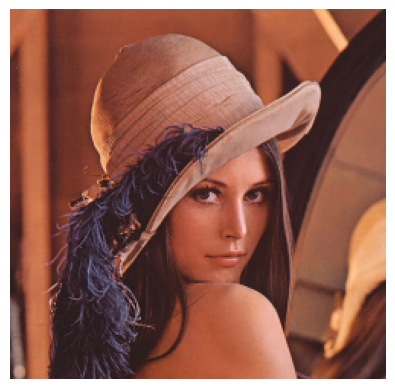

In [19]:
def pixelisation(chemin, fois=3):
    image = Image.open(chemin) 
    I = np.array(image)
    
    h, w, _ = I.shape
    I_pixel = I

    for i in range(0, h, fois): # parcourir l'image par blocs de fois*fois pixels dans la hauteur
        for j in range(0, w, fois): # parcourir l'image par blocs de fois*fois pixels dans la largeur

            # limite du carré de fois*fois pixels
            y_fin = min(i + fois, h)
            x_fin = min(j + fois, w)

            # calcul de la couleur moyenne dans le carré
            carre = I[i:y_fin, j:x_fin]
            couleur_mean = carre.mean(axis=(0, 1)).astype(np.uint8)

            # tous les pixels du carré prennent la couleur moyenne
            I_pixel[i:y_fin, j:x_fin] = couleur_mean

    image_pixel = Image.fromarray(I_pixel)
    plt.imshow(image_pixel)
    plt.axis('off')
    plt.show()

    return image_pixel

chemin = "Lena.jpg"
image_pixel = pixelisation(chemin, fois=3)